In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

[(0, 1), (0, 2), (1, 2)]


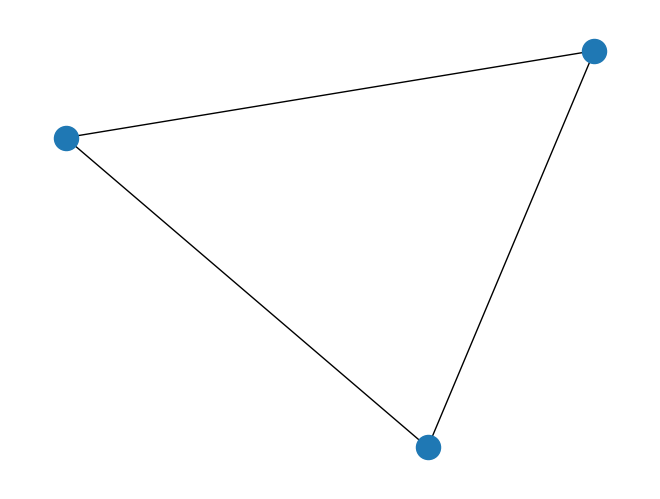

In [24]:
G = nx.complete_graph(3)
nx.draw(G)
print(G.edges)

In [11]:
def generate_complete_graph(num_nodes, weight_range=(1,100)):
    G = nx.complete_graph(num_nodes)
    for u,v in G.edges():
        G.edges[u, v]['weight'] = np.random.randint(*weight_range)
    return G

In [67]:
def plot_graph_step(G, tour, currenent_node, pos):
    plt.clf()
    nx.draw(G, pos, with_labels=True,node_color='lightblue',node_size=500)
    path_edges = list(zip(tour, tour[1:]))
    nx.draw_networkx_edges(G, pos, edgelist= path_edges, edge_color='red', width =2)
    nx.draw_networkx_nodes(G, pos, nodelist= [currenent_node], node_color='green', node_size=500)
    edge_labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.pause(0.5)

In [68]:
def calculate_tour_cost(G, tour):
    return sum(G[tour[i]][tour[i+1]]['weight'] for i in range(len(tour)-1))

In [71]:
def nearest_neighbor_tsp(G, start_node=None):
    if start_node is None:
        start_node = np.random.choice(list(G.nodes))
    
    pos = nx.spring_layout(G)
    plt.ion()
    plt.show()
    
    unvisited = set(G.nodes)
    unvisited.remove(start_node)
    tour = [start_node]
    current_node = start_node
    
    plot_graph_step(G, tour,current_node, pos)
    
    while unvisited:
        next_node = min(unvisited, key = lambda node: G[current_node][node]['weight'])
        unvisited.remove(next_node)
        tour.append(next_node)
        current_node = next_node
        
        plot_graph_step(G, tour, current_node, pos)
        
    tour.append(start_node)
    plot_graph_step(G, tour, current_node, pos)
    
    print(tour)
    tour_cost = calculate_tour_cost(G, tour)
    print(f'Construction Heuristic Tour Cost: {tour_cost}')
    
    plt.ioff()
    plt.show()


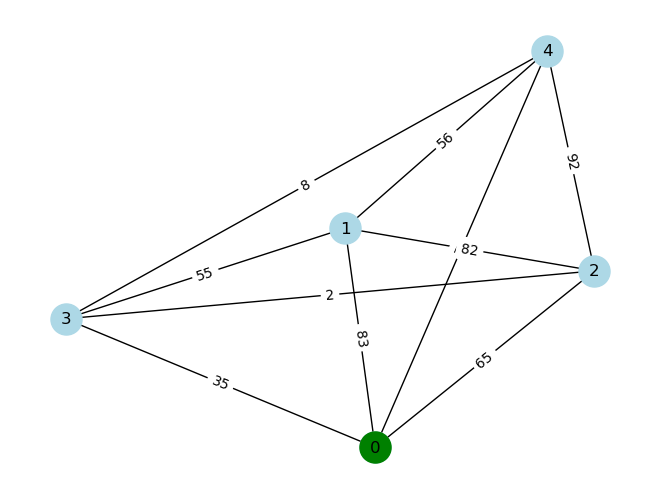

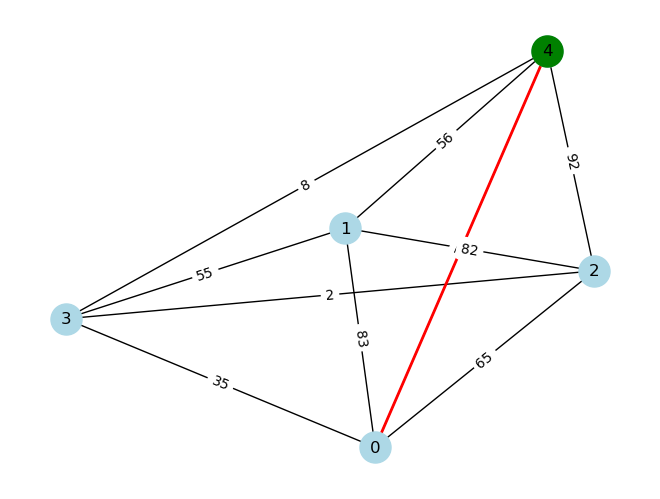

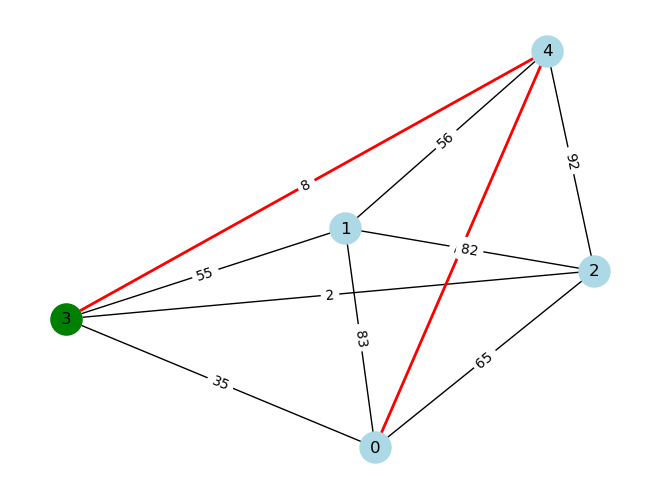

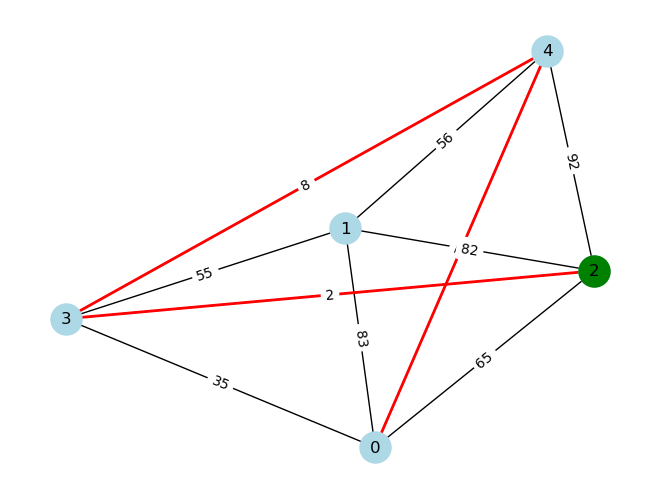

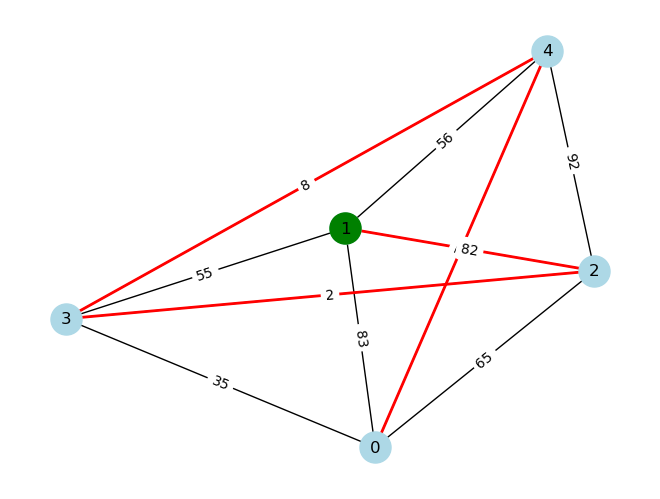

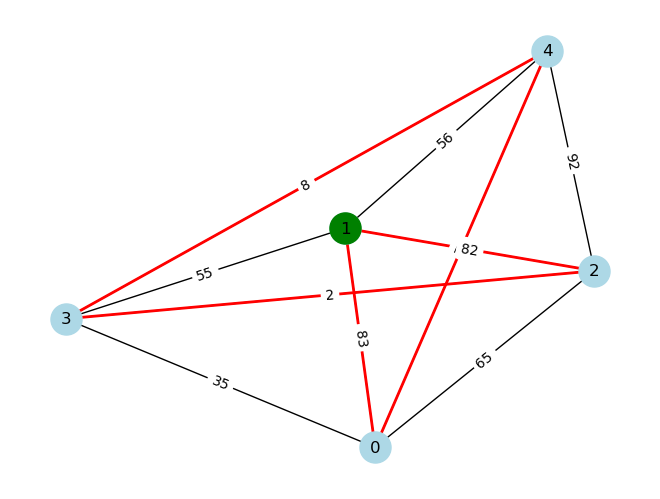

[0, 4, 3, 2, 1, 0]
Construction Heuristic Tour Cost: 182


In [72]:
G = generate_complete_graph(5)

nearest_neighbor_tsp(G)

In [45]:
np.random.choice(list(G.nodes))

0

In [49]:
s = {1,1,1,2,3}
s

{1, 2, 3}

In [50]:
s.remove(1)
s

{2, 3}

In [51]:
unvisited = set(G.nodes)
unvisited

{0, 1, 2}

In [34]:
nx.to_dict_of_dicts(generate_complete_graph(5, weight_range=(1,100)))

{0: {1: {'weight': 94},
  2: {'weight': 89},
  3: {'weight': 89},
  4: {'weight': 13}},
 1: {0: {'weight': 94},
  2: {'weight': 49},
  3: {'weight': 59},
  4: {'weight': 90}},
 2: {0: {'weight': 89},
  1: {'weight': 49},
  3: {'weight': 67},
  4: {'weight': 96}},
 3: {0: {'weight': 89},
  1: {'weight': 59},
  2: {'weight': 67},
  4: {'weight': 71}},
 4: {0: {'weight': 13},
  1: {'weight': 90},
  2: {'weight': 96},
  3: {'weight': 71}}}

In [23]:
np.random.randint(*(1,100))

70

In [26]:
for i,j in G.edges():
    print(i,j)

0 1
0 2
1 2


In [35]:
plt.clf()

<Figure size 640x480 with 0 Axes>

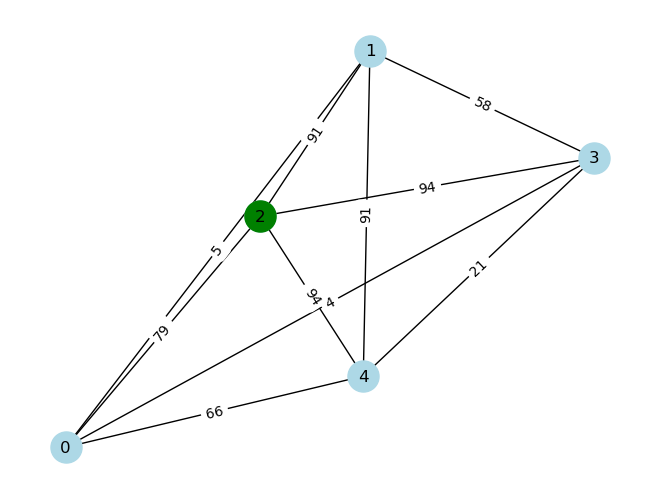

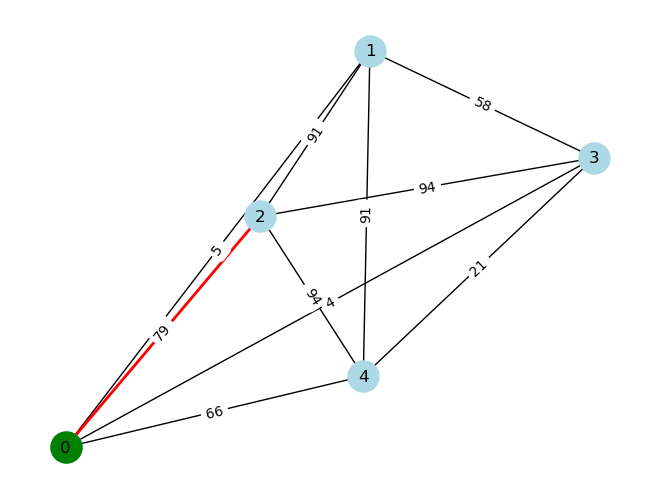

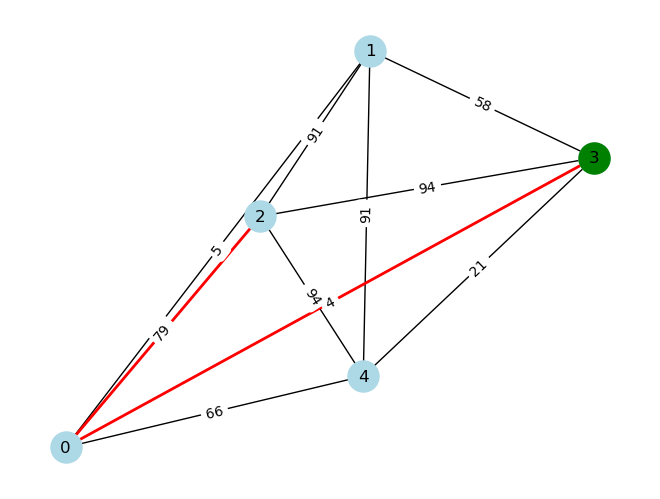

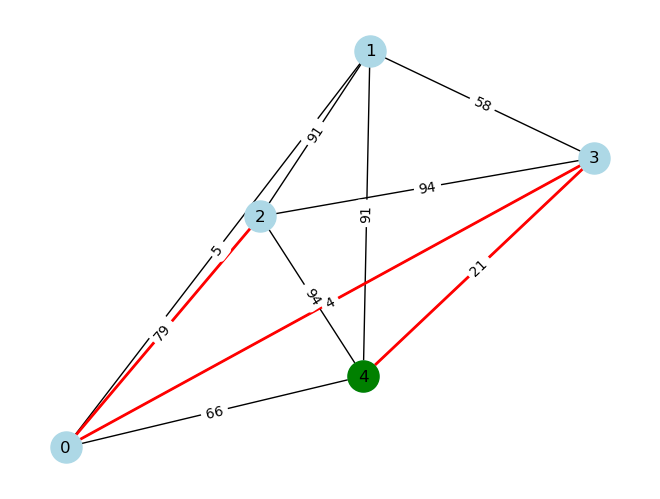

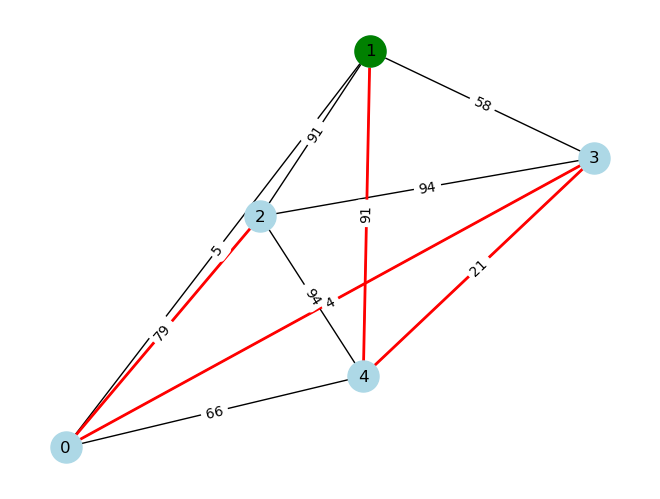

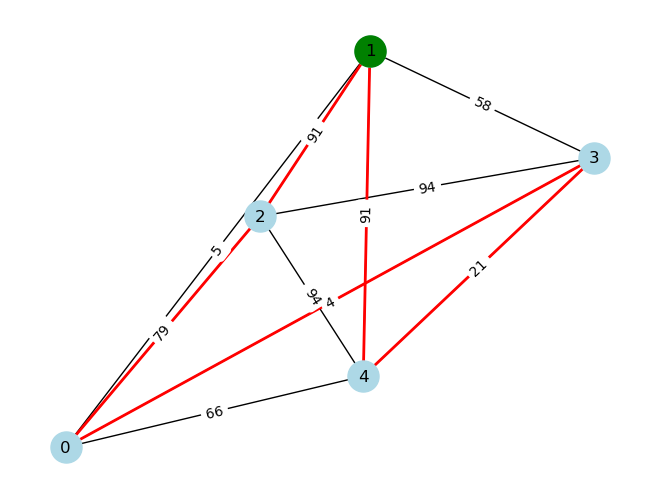

[2, 0, 3, 4, 1, 2]
Construction Heuristic Tour Cost: 286


In [73]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

class TSPSolver:
    def __init__(self, num_nodes, weight_range=(1,100)):
        self.G = self.generate_complete_graph(num_nodes, weight_range)
        self.pos = nx.spring_layout(self.G)
        self.start_node = None
    
    def generate_complete_graph(self, num_nodes, weight_range=(1,100)):
        G = nx.complete_graph(num_nodes)
        for u, v in G.edges():
            G.edges[u, v]['weight'] = np.random.randint(*weight_range)
        return G
    
    def plot_graph_step(self, tour, current_node):
        plt.clf()
        nx.draw(self.G, self.pos, with_labels=True, node_color='lightblue', node_size=500)
        path_edges = list(zip(tour, tour[1:]))
        nx.draw_networkx_edges(self.G, self.pos, edgelist=path_edges, edge_color='red', width=2)
        nx.draw_networkx_nodes(self.G, self.pos, nodelist=[current_node], node_color='green', node_size=500)
        edge_labels = nx.get_edge_attributes(self.G, 'weight')
        nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=edge_labels)
        plt.pause(0.5)
    
    def calculate_tour_cost(self, tour):
        return sum(self.G[tour[i]][tour[i+1]]['weight'] for i in range(len(tour)-1))
    
    def nearest_neighbor_tsp(self, start_node=None):
        if start_node is None:
            start_node = np.random.choice(list(self.G.nodes))
        self.start_node = start_node
        
        plt.ion()
        plt.show()
        
        unvisited = set(self.G.nodes)
        unvisited.remove(start_node)
        tour = [start_node]
        current_node = start_node
        
        self.plot_graph_step(tour, current_node)
        
        while unvisited:
            next_node = min(unvisited, key=lambda node: self.G[current_node][node]['weight'])
            unvisited.remove(next_node)
            tour.append(next_node)
            current_node = next_node
            
            self.plot_graph_step(tour, current_node)
        
        tour.append(start_node)
        self.plot_graph_step(tour, current_node)
        
        print(tour)
        tour_cost = self.calculate_tour_cost(tour)
        print(f'Construction Heuristic Tour Cost: {tour_cost}')
        
        plt.ioff()
        plt.show()

# Example usage:
solver = TSPSolver(5)
solver.nearest_neighbor_tsp()
